### Buisness Case

- Purpose: to analyze train delays in France
- Stakeholder: a railroad manager who needs to identify the reasons for delays on selected rail lines

### Import Libs

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleainingFunctions as dc
import missingno as ms

### Notebook Options

In [254]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

### Dataset Imports

In [255]:
# Read train dataset 
df = pd.read_csv('CSV\Regularities_by_liaisons_Trains_France.csv')

In [256]:
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


### Data Check & Inspection

In [257]:
# Check main informations about dataset
dc.stats(df)

### Shape ###
Rows: 7806
Columns: 32


### Data Types ###
Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                   

In [258]:
# Information about missing values, only values bigger than 0
dc.miss_dupl(df)



### Missing Values ###
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                       

In [259]:
# Numeric information about columns
df.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [260]:
# Freq for averege delay of departing trains
df['Average delay of all departing trains (min)'].value_counts()

Average delay of all departing trains (min)
0.000000    8
1.000000    7
1.366667    5
0.400000    4
0.250000    4
           ..
0.932124    1
3.640326    1
7.249435    1
0.575194    1
2.055769    1
Name: count, Length: 7575, dtype: int64

In [261]:
# Freq for averege delay of arriving trains
df['Average delay of all arriving trains (min)'].value_counts()

Average delay of all arriving trains (min)
 3.000000    6
 4.000000    4
 2.666667    4
 6.000000    3
 3.200000    3
            ..
 4.345986    1
 2.410344    1
 3.260750    1
 3.341613    1
-0.457051    1
Name: count, Length: 7619, dtype: int64

In [262]:
# Conditions for only trains with delay above 0 mins
arr = df['Average delay of all arriving trains (min)'] > 0
dep = df['Average delay of all departing trains (min)'] > 0

In [263]:
# Filtering data set according to conditions
df = df[arr & dep]

In [264]:
# Top 10 Arrival stations in dataset
df['Arrival station'].value_counts().head(10)

Arrival station
PARIS LYON              1533
PARIS MONTPARNASSE      1031
PARIS EST                368
LYON PART DIEU           353
MARSEILLE ST CHARLES     256
PARIS NORD               238
LILLE                    190
RENNES                   140
NANTES                   137
STRASBOURG               128
Name: count, dtype: int64

In [265]:
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


#### Column Analysis
1. Year: Rok, do którego odnosi się analiza. Można wykorzystać tę kolumnę do analizy trendów opóźnień w ciągu lat.
2. Month: Miesiąc, do którego odnosi się analiza. Pozwoli Ci to na zbadanie sezonowych wzorców opóźnień.
3. Departure station i Arrival station: Stacje początkowe i końcowe trasy. Można analizować, czy niektóre trasy są bardziej narażone na opóźnienia niż inne.
4. Average travel time (min): Średni czas podróży. Można zobaczyć, czy są zależności między długością trasy a opóźnieniami.
5. Number of expected circulations: Liczba przewidywanych kursów. Porównaj tę wartość z rzeczywistą liczbą kursów, aby zidentyfikować, czy niektóre trasy są bardziej obciążone niż inne.
6. Number of cancelled trains: Liczba anulowanych pociągów. To ważny wskaźnik, który może wskazywać na problemy z infrastrukturą lub zarządzaniem ruchem.
7. Number of late trains at departure i Number of late trains on arrival: Liczba pociągów spóźnionych na odjeździe i przyjeździe. Kluczowe wskaźniki analizujące punktualność.
8. Average delay of late departing trains i Average delay of late arriving trains: Średnie opóźnienie spóźnionych pociągów. Pozwoli to zrozumieć, jak bardzo spóźnione pociągi rzeczywiście opóźniają podróże.
9. % trains late due to...: Procent pociągów spóźnionych z powodu różnych przyczyn, takich jak pogoda, infrastruktura, zarządzanie ruchem itp. To pozwoli zidentyfikować główne źródła problemów.
10. Number of late trains > 15min, > 30min, > 60min: Liczba pociągów spóźnionych o określonych interwałach czasowych. Pomocne w identyfikowaniu poważnych opóźnień.
11. Period: Okres czasu, do którego odnosi się analiza. Można to wykorzystać do grupowania danych w zależności od potrzeb, np. miesiące, kwartały, czy lata.
12. Delay due to...: Opóźnienia spowodowane różnymi czynnikami, takimi jak przyczyny zewnętrzne, infrastruktura kolejowa, zarządzanie ruchem itp. Można zbadać, które czynniki mają największy wpływ na opóźnienia. Warto zamienić na wartosci kategoryczne


#### ToDo
Clean:
- Usunąc kolumny z departure, interesuja nas tylko arrival
- Wywalic kolumne comment
- Wywalic % kolumny poniewaz mamy inne kolumny okreslajace te same wartosci
- Period do usuniecia
- Update datatype dla kolumn
- Sprawdzenie NaN (usuniecie NaN dla kolumn ponizej 5% brakujacych)
- Outlinersy
Feature:
- Połaczyc Departure i Arrival station aby była konkretna linia kolejowa.
- Od expected circulations odjąć cancelled, które nas nie interesuja
- Stworzenie kategorii delay to...
- Stworzenie kategorii opozniej 'small', 'medium', 'high', 'very high'
Analysis:
- Zobaczyc ile % było opoznionych wzgledem cirulations
- Średnie opóźnienie spóźnionych pociągów(All i Late)
- Pokazanie ilosciowo, które opoznienia były najwieksze w zakresie czasowym, całosciowo jak i dla wybranych tras
- Korelacje


### Data Cleaning

In [266]:
# Copy of dataset
df_clean = df.copy()

In [267]:
# Save dataset to new CSV file
df_clean.to_csv('CSV\Clean_DataSet_Trains.csv')

#### Column Drops

In [268]:
# List of columns for drop
col_to_drop = [
    'Number of late trains at departure',
    'Average delay of late departing trains (min)',
    'Average delay of all departing trains (min)',
    '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
    '% trains late due to railway infrastructure (maintenance, works)',
    '% trains late due to traffic management (rail line traffic, network interactions)',
    '% trains late due to rolling stock',
    '% trains late due to station management and reuse of material',
    '% trains late due to passenger traffic (affluence, PSH management, connections)',
    'Period', 'Delay due to external causes',
    'Comment (optional) delays at departure',
    'Comment (optional) delays on arrival']

In [269]:
# Drop non need columns
df_clean.drop(columns= col_to_drop, inplace= True)

In [270]:
# Chek if drop was successfully
assert all(col not in df_clean.columns for col in col_to_drop), 'Failed to delete all columns.'

print('The columns were successfully deleted.')

The columns were successfully deleted.


#### Missing Values

In [271]:
# Chcking missing values for each columns in %
missing_values = (df_clean.isna().sum() / len(df_clean))* 100
missing_values

Year                                                     0.000000
Month                                                    0.000000
Departure station                                        0.000000
Arrival station                                          0.000000
Average travel time (min)                                0.000000
Number of expected circulations                          0.000000
Number of cancelled trains                               0.000000
Number of trains late on arrival                         0.241061
Average delay of late arriving trains (min)              0.254453
Average delay of all arriving trains (min)               0.000000
Number of late trains > 15min                            0.013392
Average train delay > 15min                              0.321414
Number of late trains > 30min                            0.013392
Number of late trains > 60min                            0.013392
Delay due to railway infrastructure                      2.383822
Delay due 

<Axes: >

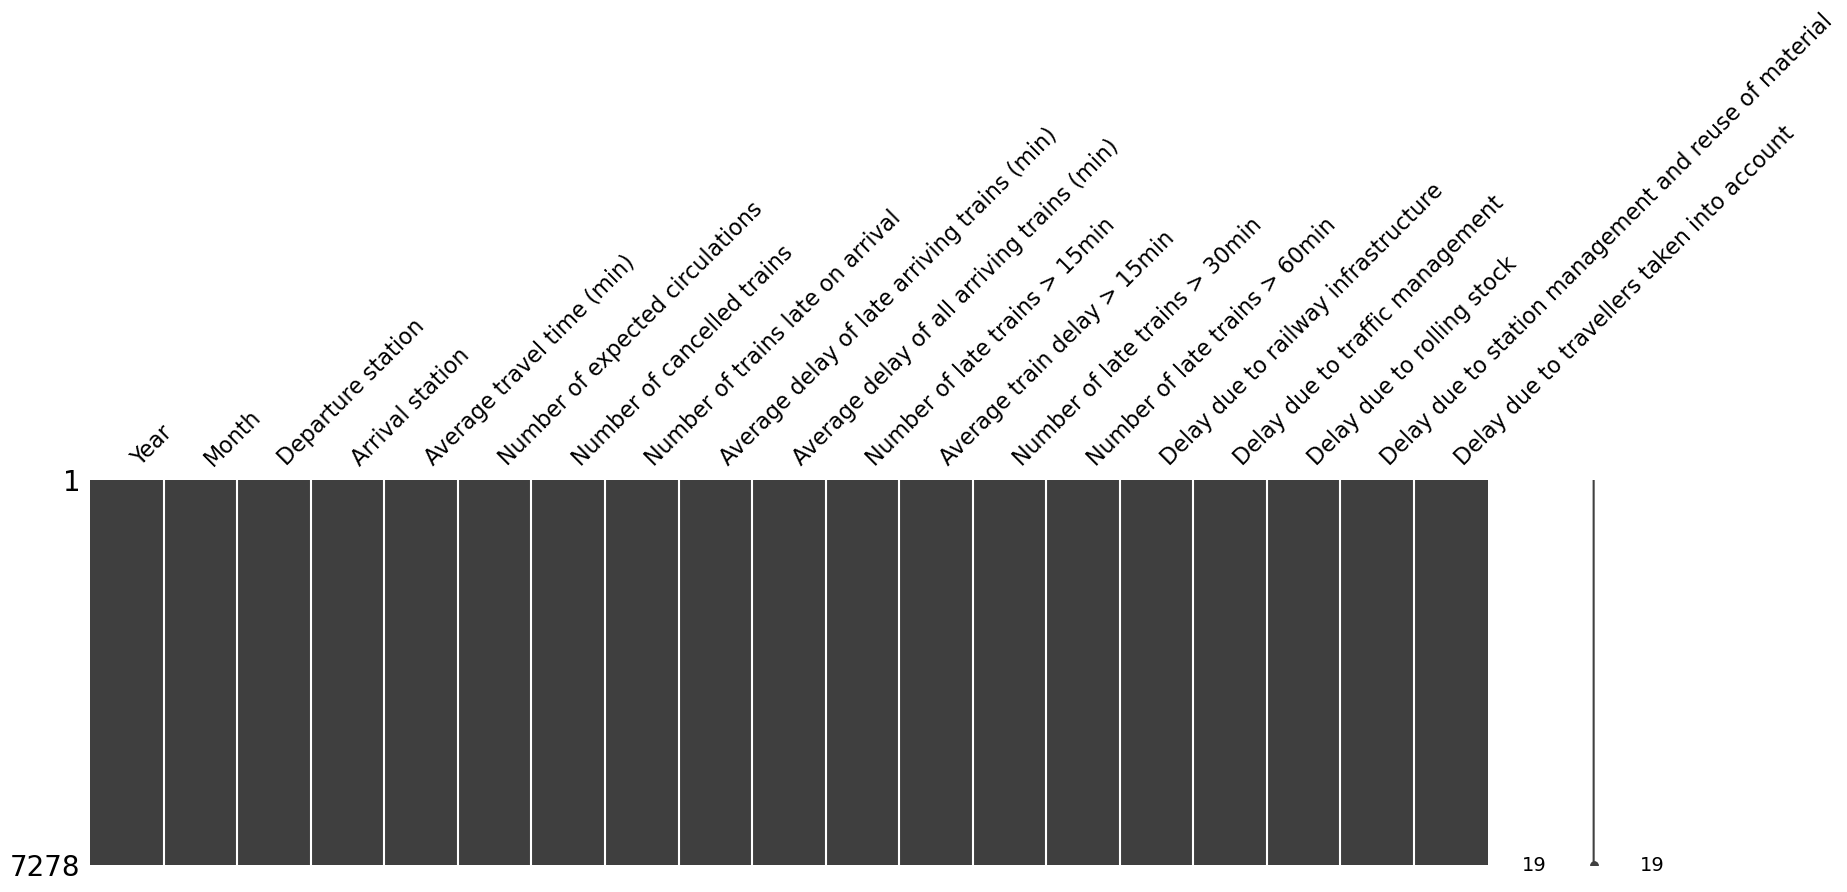

In [287]:
# Visualization of missing values
ms.matrix(df_clean, figsize= [20, 5])

In [273]:
# List of rown for drop
col_to_drop = dc.drop_missing_five(df_clean)

In [274]:
# Drop missing values below 5%
df_clean.dropna(subset = col_to_drop, inplace = True)

In [275]:
# Check if droping missing values was ok
assert any(col for col in df_clean.columns if df_clean[col].isna().sum() == 0), 'Found missing values in at least one column'
print('Missing values not found in any column')

Missing values not found in any column


<Axes: >

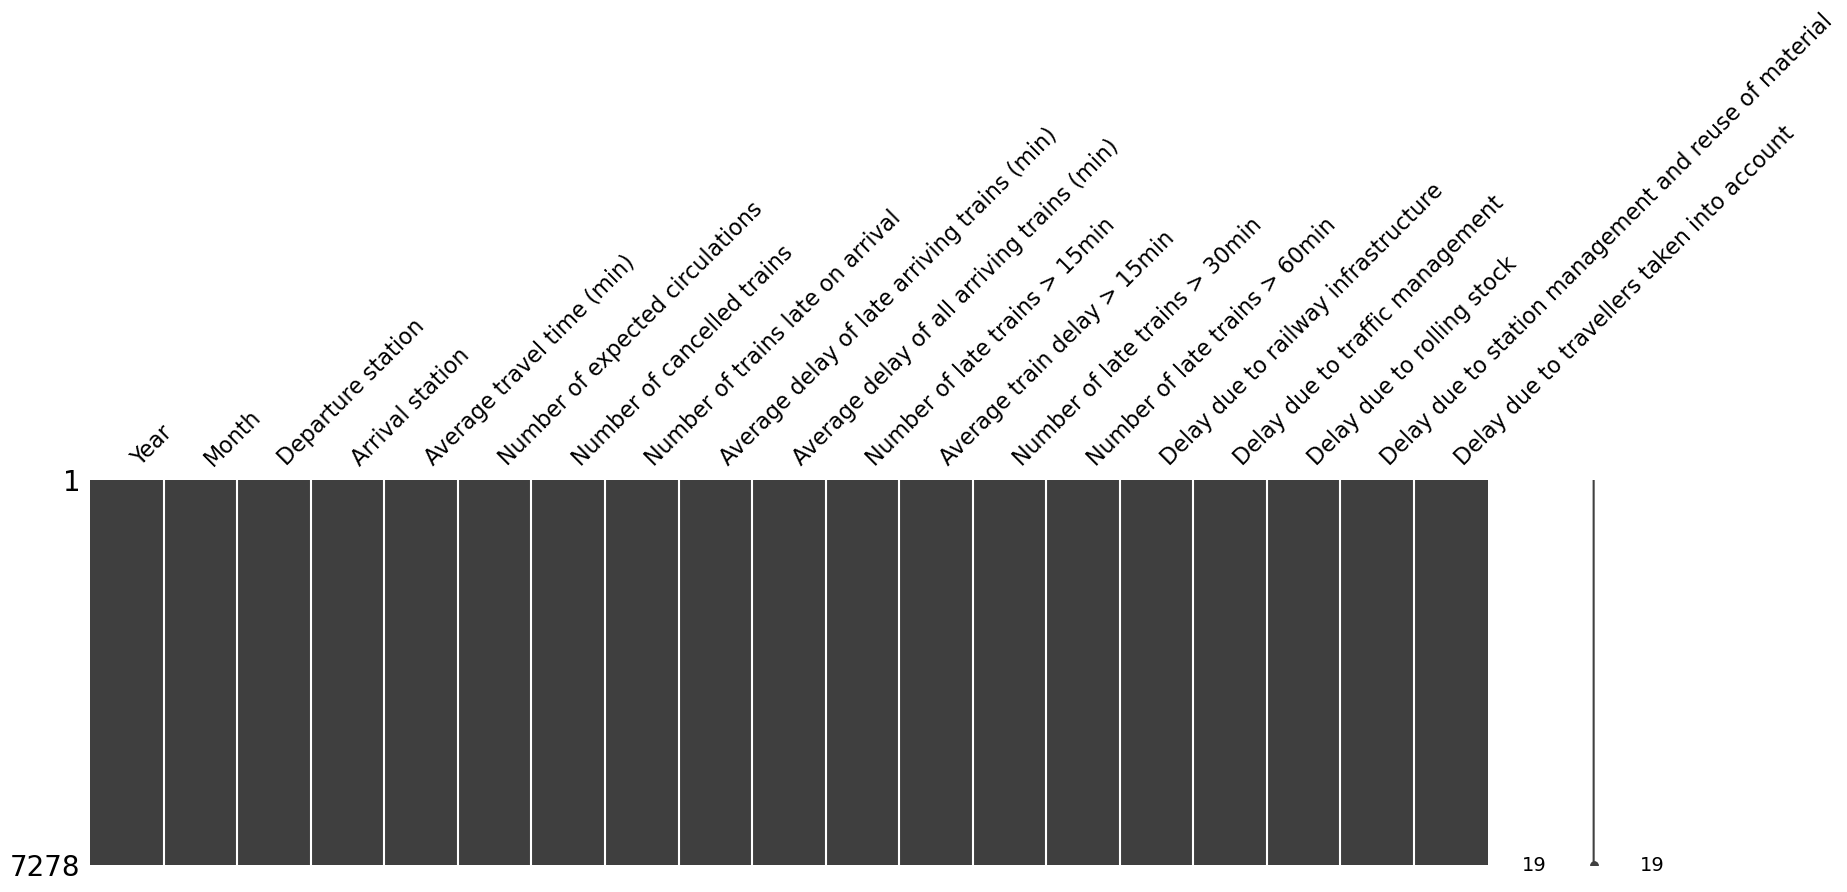

In [286]:
# Visualization of missing values
ms.matrix(df_clean, figsize= [20, 5])

#### Update Data Types

In [288]:
# Check column type and size in bytes
dc.columns_bsize(df_clean)

['Year --- 58224 --- int64',
 'Month --- 58224 --- float64',
 'Departure station --- 58224 --- object',
 'Arrival station --- 58224 --- object',
 'Average travel time (min) --- 58224 --- float64',
 'Number of expected circulations --- 58224 --- float64',
 'Number of cancelled trains --- 58224 --- float64',
 'Number of trains late on arrival --- 58224 --- float64',
 'Average delay of late arriving trains (min) --- 58224 --- float64',
 'Average delay of all arriving trains (min) --- 58224 --- float64',
 'Number of late trains > 15min --- 58224 --- float64',
 'Average train delay > 15min --- 58224 --- float64',
 'Number of late trains > 30min --- 58224 --- float64',
 'Number of late trains > 60min --- 58224 --- float64',
 'Delay due to railway infrastructure --- 58224 --- float64',
 'Delay due to traffic management --- 58224 --- float64',
 'Delay due to rolling stock --- 58224 --- float64',
 'Delay due to station management and reuse of material --- 58224 --- float64',
 'Delay due to trav

In [289]:
# Create list of columns that should be int type
to_int = ['Year', 'Month', 'Number of expected circulations', 'Number of cancelled trains',
           'Number of trains late on arrival', 'Number of late trains > 15min', 'Number of late trains > 30min',
           'Number of late trains > 60min']

In [290]:
# Change column type to int type
dc.change_to_int(df_clean, to_int)

In [292]:
assert all(df_clean[col].dtype == 'int16' for col in to_int),  'Failed to convert all columns.'

print('The columns were successfully converted to int16.')

The columns were successfully converted to int16.


In [291]:
# Check column type and size in bytes
dc.columns_bsize(df_clean)

['Year --- 14556 --- int16',
 'Month --- 14556 --- int16',
 'Departure station --- 58224 --- object',
 'Arrival station --- 58224 --- object',
 'Average travel time (min) --- 58224 --- float64',
 'Number of expected circulations --- 14556 --- int16',
 'Number of cancelled trains --- 14556 --- int16',
 'Number of trains late on arrival --- 14556 --- int16',
 'Average delay of late arriving trains (min) --- 58224 --- float64',
 'Average delay of all arriving trains (min) --- 58224 --- float64',
 'Number of late trains > 15min --- 14556 --- int16',
 'Average train delay > 15min --- 58224 --- float64',
 'Number of late trains > 30min --- 14556 --- int16',
 'Number of late trains > 60min --- 14556 --- int16',
 'Delay due to railway infrastructure --- 58224 --- float64',
 'Delay due to traffic management --- 58224 --- float64',
 'Delay due to rolling stock --- 58224 --- float64',
 'Delay due to station management and reuse of material --- 58224 --- float64',
 'Delay due to travellers taken i

### Anylysis

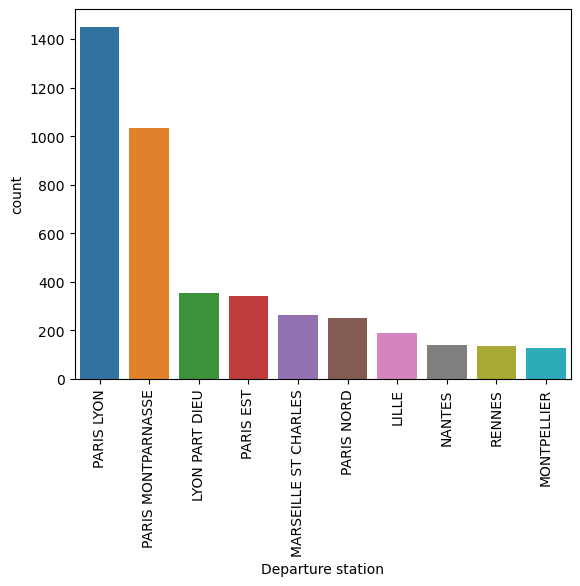

In [277]:
# Chart with top 10 Departure stations
sns.countplot(data = df_clean, x = "Departure station", order = df_clean['Departure station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

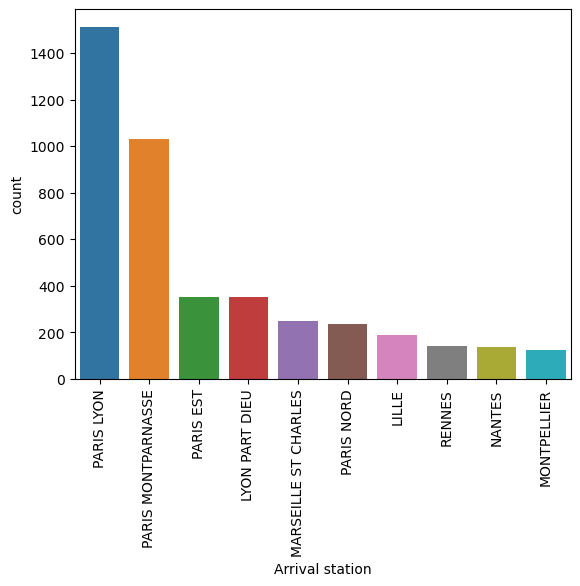

In [278]:
# Chart with top 10 Arrival stations
sns.countplot(data = df_clean, x = "Arrival station", order = df_clean['Arrival station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

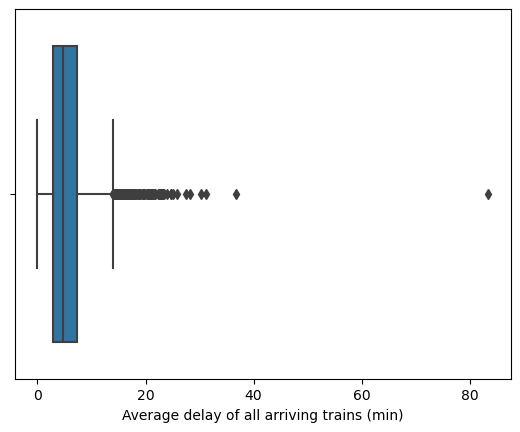

In [279]:
# Chart showing distributions for all arrving trains delays
sns.boxplot(data= df_clean, x = 'Average delay of all arriving trains (min)')
plt.show()

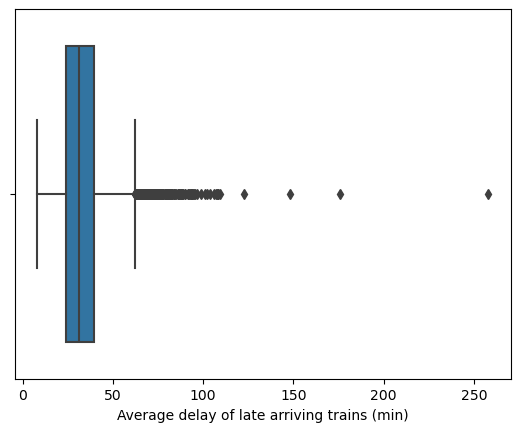

In [280]:
# Chart showing distributions for all arrving trains delays
sns.boxplot(data= df_clean, x = 'Average delay of late arriving trains (min)')
plt.show()

In [281]:
# Top 10 Departure stations
top_10_dep_stations = df_clean['Departure station'].value_counts().head(10).index
top_10_dep_stations

Index(['PARIS LYON', 'PARIS MONTPARNASSE', 'LYON PART DIEU', 'PARIS EST',
       'MARSEILLE ST CHARLES', 'PARIS NORD', 'LILLE', 'NANTES', 'RENNES',
       'MONTPELLIER'],
      dtype='object', name='Departure station')

In [282]:
# Top 10 stations participation in whole station list
top_10 = round((len(df_clean[df_clean['Departure station'].isin(top_10_dep_stations)]) / len(df_clean) ) * 100, 2)
print(f'Top 10 Departure Station is {top_10} % of whole dataset.')

Top 10 Departure Station is 58.94 % of whole dataset.
